In [5]:
!pip install pandas numpy boto3 matplotlib seaborn scikit-learn

  Using cached boto3-1.42.16-py3-none-any.whl.metadata (6.8 kB)
  Using cached botocore-1.42.16-py3-none-any.whl.metadata (5.9 kB)
  Using cached s3transfer-0.16.0-py3-none-any.whl.metadata (1.7 kB)
Using cached boto3-1.42.16-py3-none-any.whl (140 kB)
Using cached botocore-1.42.16-py3-none-any.whl (14.6 MB)
Using cached s3transfer-0.16.0-py3-none-any.whl (86 kB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.42.16 which is incompatible.


In [1]:
# Cell 1: Import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up plotting
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print(" Libraries loaded!")

✅ Libraries loaded!


In [17]:
# Cell 2: Load sample of papers (1000 to start)
print("Loading papers...")

papers = []
with open('/Users/aashigoyani/research-paper-recommender/rpr/data/raw/arxiv-metadata-oai-snapshot.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= 1000:  # Start with 1000
            break
        papers.append(json.loads(line))
        
        if (i + 1) % 100 == 0:
            print(f"Loaded {i + 1} papers...")

print(f"\n Loaded {len(papers)} papers!")

Loading papers...
Loaded 100 papers...
Loaded 200 papers...
Loaded 300 papers...
Loaded 400 papers...
Loaded 500 papers...
Loaded 600 papers...
Loaded 700 papers...
Loaded 800 papers...
Loaded 900 papers...
Loaded 1000 papers...

✅ Loaded 1000 papers!


In [19]:
# Cell 3: Convert to DataFrame and explore
df = pd.DataFrame(papers)

print(f" Dataset Shape: {df.shape}")
print(f"\n Columns:")
print(df.columns.tolist())
print(f"\n First few rows:")
df.head()

📊 Dataset Shape: (1000, 14)

📋 Columns:
['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed']

🔍 First few rows:


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [21]:
# Cell 4: Look at one paper in detail
sample = papers[0]

print("=" * 60)
print("SAMPLE PAPER")
print("=" * 60)
print(f" ID: {sample['id']}")
print(f" Title: {sample['title']}")
print(f" Authors: {sample['authors']}")
print(f"  Categories: {sample['categories']}")
print(f"\n Abstract:")
print(sample['abstract'][:500] + "...")

SAMPLE PAPER
📝 ID: 0704.0001
📚 Title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
👥 Authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan
🏷️  Categories: hep-ph

📄 Abstract:
  A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agr...


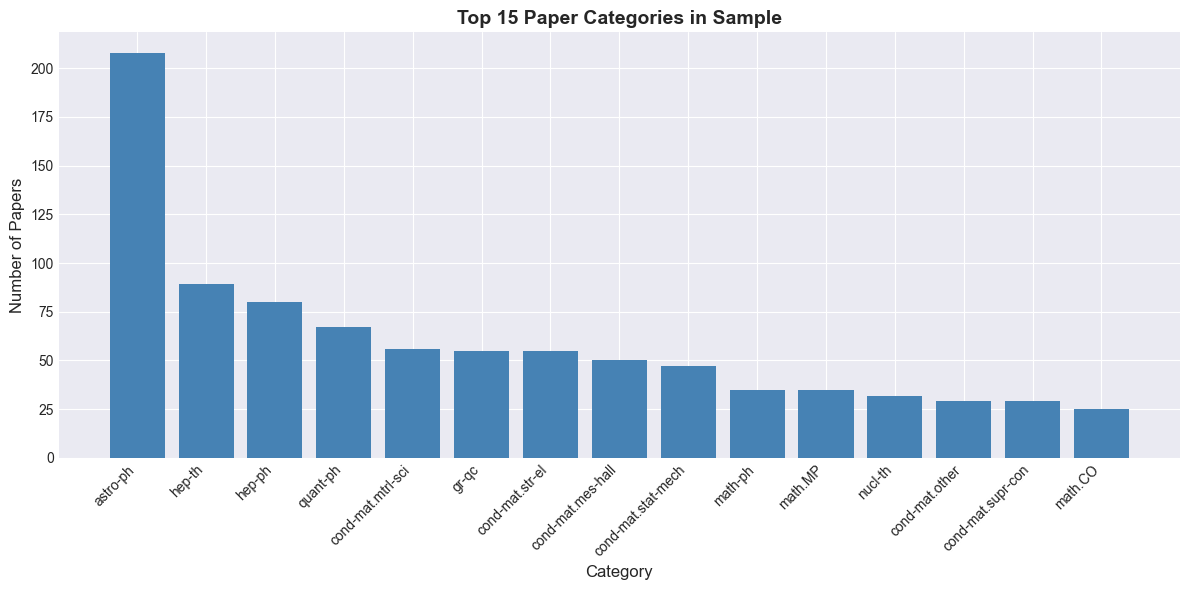


📊 Most common category: astro-ph (208 papers)


In [23]:
# Cell 5: Visualize categories
all_categories = []
for cats in df['categories']:
    all_categories.extend(cats.split())

category_counts = Counter(all_categories).most_common(15)
categories, counts = zip(*category_counts)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='steelblue')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.title('Top 15 Paper Categories in Sample', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n Most common category: {categories[0]} ({counts[0]} papers)")

📏 ABSTRACT LENGTH STATISTICS
Average: 799 characters
Median: 732 characters
Min: 44 characters
Max: 1869 characters


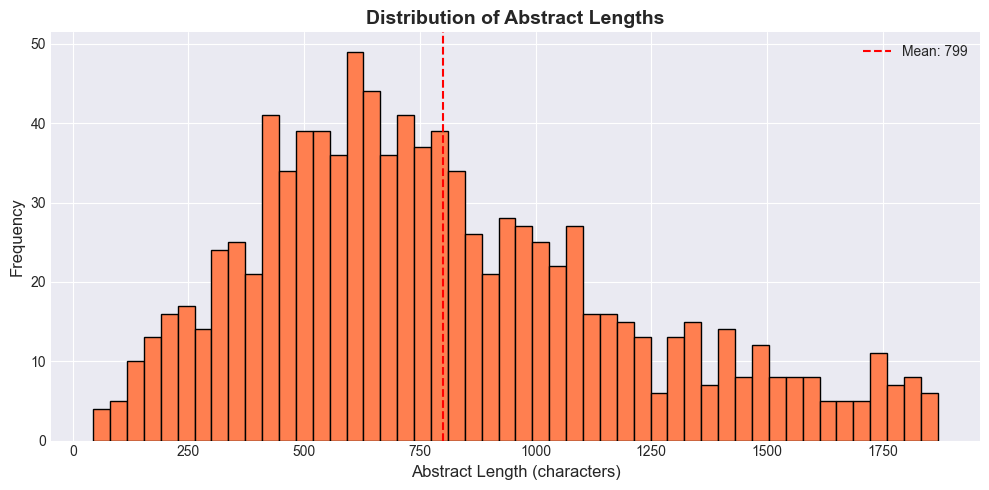

In [ ]:
# Cell 6: Abstract length analysis
df['abstract_length'] = df['abstract'].str.len()
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Statistics
print(" ABSTRACT LENGTH STATISTICS")
print(f"Average: {df['abstract_length'].mean():.0f} characters")
print(f"Median: {df['abstract_length'].median():.0f} characters")
print(f"Min: {df['abstract_length'].min():.0f} characters")
print(f"Max: {df['abstract_length'].max():.0f} characters")

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['abstract_length'], bins=50, color='coral', edgecolor='black')
plt.xlabel('Abstract Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Abstract Lengths', fontsize=14, fontweight='bold')
plt.axvline(df['abstract_length'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["abstract_length"].mean():.0f}')
plt.legend()
plt.tight_layout()
plt.show()
